In [1]:
import pandas as pd, numpy as np
import rank_countries_by_stunting as rbs
import sys, os.path
sys.path.append(os.path.abspath("../.."))

!whoami
!date

ndbs
Tue Nov  3 14:23:18 PST 2020


In [2]:
from pre_processing.id_helper import *

/ihme/code/central_comp/miniconda3_10_30_2019/envs/gbd_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
%load_ext autoreload
%autoreload 2

# Load saved stunting data so I don't have to call `get_draws`, which takes awhile

In [4]:
stunting = pd.read_hdf('stunting_prevalence_2019.hdf')
stunting.head()

,rei_id,modelable_entity_id,location_id,year_id,age_group_id,sex_id,parameter,measure_id,metric_id,draw_0,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,241,8951.0,6,2019,1,3,cat3,5,3,0.303820,...,0.320197,0.322260,0.296655,0.311466,0.282390,0.319573,0.306733,0.304351,0.308995,0.343090
1,241,8951.0,7,2019,1,3,cat3,5,3,0.332241,...,0.308521,0.365996,0.366902,0.324369,0.349718,0.372429,0.328082,0.314922,0.320968,0.357297
2,241,8951.0,8,2019,1,3,cat3,5,3,0.188571,...,0.166204,0.174744,0.173367,0.172879,0.179043,0.164431,0.172707,0.169683,0.145522,0.169720
3,241,8951.0,10,2019,1,3,cat3,5,3,0.345206,...,0.327548,0.355528,0.346804,0.347003,0.352576,0.342982,0.351583,0.343957,0.353110,0.358065
4,241,8951.0,11,2019,1,3,cat3,5,3,0.274161,...,0.274958,0.272785,0.274118,0.275281,0.269320,0.272719,0.267390,0.272035,0.267614,0.269422


### Test my regex for draw columns and visualize stunting data for one location

In [5]:
draw_cols = stunting.filter(regex=r'^draw_\d{1,3}$').columns
len(draw_cols)

1000

<AxesSubplot:>

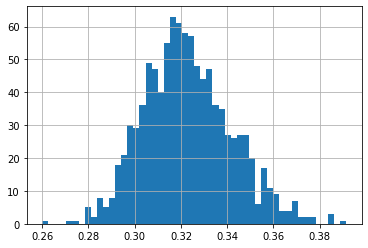

In [6]:
stunting.loc[0,draw_cols].hist(bins=50)

# Process original country data using module functions

### View original csv file - we only need the first 3 columns

In [7]:
orig_data = pd.read_csv('bgmf_countries.csv')
orig_data.head()

/ihme/code/central_comp/miniconda3_10_30_2019/envs/gbd_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,BMGF 2013 paper survey year,BMGF 2013 paper % stunting,GBD 2019 Percent Stunted,GBD 2019 Number Stunted,Percent VAD in GBD 2019,Data Status,Baseline Coverage of LSFF,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iron,Notes,Data Source,...,Notes,Data Source,Folic Acid,Notes,Data Source,Zinc,Notes,Data Source,NaN,NaN
1,India,2005-06,47.9,NaN,NaN,NaN,Not collected,NaN,Included in GBD 2017 LSFF model,NaN,...,Included in GBD 2017 LSFF model,NaN,NaN,Included in GBD 2017 LSFF model,NaN,NaN,NaN,NaN,NaN,NaN
2,Nigeria,2008,41.0,NaN,NaN,NaN,Not collected,NaN,Included in GBD 2017 LSFF model,NaN,...,Included in GBD 2017 LSFF model,NaN,NaN,Included in GBD 2017 LSFF model,NaN,NaN,NaN,NaN,NaN,NaN
3,Pakistan,2011,43.0,NaN,NaN,NaN,Not collected,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,2010,39.2,NaN,NaN,NaN,Not collected,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean original csv file

In [8]:
orig_countries = rbs.clean_orig_country_data('bgmf_countries.csv')
orig_countries.head()

,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
0,1,India,2005-06,47.9
1,2,Nigeria,2008,41.0
2,3,Pakistan,2011,43.0
3,4,Indonesia,2010,39.2
4,5,Bangladesh,2007,43.2


### Use location id's from the stunting dataframe to assign correct id's to each country

In [9]:
orig_countries_with_ids = rbs.add_location_ids_to_orig_countries(orig_countries, stunting.location_id.unique())
orig_countries_with_ids

,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting,location_id,location_name
0,1,India,2005-06,47.9,163.0,India
1,2,Nigeria,2008,41.0,214.0,Nigeria
2,3,Pakistan,2011,43.0,165.0,Pakistan
3,4,Indonesia,2010,39.2,11.0,Indonesia
4,5,Bangladesh,2007,43.2,161.0,Bangladesh
5,6,Ethiopia,2010-11,44.2,179.0,Ethiopia
6,7,Democratic Republic of the Congo,2010,43.4,171.0,Democratic Republic of the Congo
7,8,Philippines,2008,32.3,16.0,Philippines
8,9,Tanzania,2009-10,42.5,189.0,United Republic of Tanzania
9,10,Afghanistan,2004,39.3,160.0,Afghanistan


# Process stunting data using module functions

### Compute mean over draws

In [10]:
stunting_mean = rbs.compute_mean_stunting_prevalence_by_location(stunting)
stunting_mean.head()

,age_group_id,location_id,measure_id,metric_id,rei_id,sex_id,year_id,stunting_prevalence
0,1,6,5,3,241,3,2019,0.110515
1,1,7,5,3,241,3,2019,0.297625
2,1,8,5,3,241,3,2019,0.029480
3,1,10,5,3,241,3,2019,0.403864
4,1,11,5,3,241,3,2019,0.341780


In [11]:
list(stunting_mean.age_group_id.unique())

[1]

### Add location names and populations, then remove extraneous columns

In [12]:
stunting_with_names_populations = rbs.add_location_names_and_populations(stunting_mean)
stunting_with_names_populations.head()

,age_group_id,location_id,measure_id,metric_id,rei_id,sex_id,year_id,stunting_prevalence,location_name,population_under_5
0,1,6,5,3,241,3,2019,0.110515,China,8.149086e+07
1,1,7,5,3,241,3,2019,0.297625,Democratic People's Republic of Korea,1.665364e+06
2,1,8,5,3,241,3,2019,0.029480,Taiwan (Province of China),9.825697e+05
3,1,10,5,3,241,3,2019,0.403864,Cambodia,1.767535e+06
4,1,11,5,3,241,3,2019,0.341780,Indonesia,1.970635e+07


In [13]:
stunting_with_names_populations.shape

(195, 10)

In [14]:
stunting_formatted = rbs.format_stunting_dataframe(stunting_with_names_populations)
stunting_formatted.head()

,location_name,location_id,stunting_prevalence,population_under_5
0,China,6,0.110515,8.149086e+07
1,Democratic People's Republic of Korea,7,0.297625,1.665364e+06
2,Taiwan (Province of China),8,0.029480,9.825697e+05
3,Cambodia,10,0.403864,1.767535e+06
4,Indonesia,11,0.341780,1.970635e+07


### Rank countries in descending order by number of children stunted

In [15]:
stunting_sorted = rbs.compute_number_stunted_and_sort_descending(stunting_formatted, copy=True)
stunting_sorted.head()

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted
rank_2019_all,,,,,
1,India,163,0.398865,1.170708e+08,4.669548e+07
2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07
3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07
4,China,6,0.110515,8.149086e+07,9.005922e+06
5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06


In [16]:
stunting_sorted.tail()

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted
rank_2019_all,,,,,
191,Greenland,349,0.029628,4002.765904,118.592339
192,Palau,380,0.094422,989.271875,93.408897
193,Andorra,74,0.008707,2700.417976,23.512445
194,San Marino,396,0.010129,1628.735200,16.497684
195,Monaco,367,0.008109,1624.157827,13.170689


### Compute percentage of global stunted population covered as we move down the list

In [17]:
stunting_with_cumsum = rbs.compute_cumulative_number_stunted_and_percent_of_global_population(stunting_sorted,
                                                                                              copy=True)
stunting_with_cumsum.head()

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop
rank_2019_all,,,,,,,
1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4
2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6
3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6
4,China,6,0.110515,8.149086e+07,9.005922e+06,8.077064e+07,45.7
5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5


### Test some random stuff...

In [18]:
# Estimate global stunted population from percents
# Actual value is about 176909741
(stunting_with_cumsum['cumulative_number_stunted'] /
 (stunting_with_cumsum['cum_percent_global_stunted_pop']/100)
).median()

176905532.59500098

In [19]:
number = 20.67
f'number: {number:.0f}'

'number: 21'

### Add columns to filter to $\ge 20\%$ and $\ge 18\%$ stunting, and re-rank and re-compute cumulative percentages of global stunted population

In [20]:
stunting_with_20and18cutoffs = rbs.add_rank_and_cumulative_percent_for_cutoffs(
    stunting_with_cumsum, 20, 18, copy=True)

stunting_with_20and18cutoffs.head()

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent
rank_2019_all,,,,,,,,,,,,,
1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4,True,1,26.4,True,1,26.4
2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6,True,2,33.6,True,2,33.6
3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6,True,3,40.6,True,3,40.6
4,China,6,0.110515,8.149086e+07,9.005922e+06,8.077064e+07,45.7,False,3,40.6,False,3,40.6
5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5,True,4,44.4,True,4,44.4


In [21]:
stunting_with_20and18cutoffs.tail()

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent
rank_2019_all,,,,,,,,,,,,,
191,Greenland,349,0.029628,4002.765904,118.592339,1.769096e+08,100.0,False,74,86.0,False,79,88.0
192,Palau,380,0.094422,989.271875,93.408897,1.769097e+08,100.0,False,74,86.0,False,79,88.0
193,Andorra,74,0.008707,2700.417976,23.512445,1.769097e+08,100.0,False,74,86.0,False,79,88.0
194,San Marino,396,0.010129,1628.735200,16.497684,1.769097e+08,100.0,False,74,86.0,False,79,88.0
195,Monaco,367,0.008109,1624.157827,13.170689,1.769097e+08,100.0,False,74,86.0,False,79,88.0


# Outer merge stunting data with original country data, and limit to X countries in the least inclusive list

Test with X=50 to make sure my function works.

In [22]:
merged = rbs.merge_stunting_with_orig_countries(
    stunting_with_20and18cutoffs, orig_countries_with_ids, stunting_cutoffs=[20,18], num_countries=50)
merged.tail()

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
63,64,Lao People's Democratic Republic,12,0.451162,8.014799e+05,361596.883218,1.697133e+08,95.9,True,47,84.0,True,51,86.1,NaN,NaN,NaN,NaN
64,65,Venezuela (Bolivarian Republic of),133,0.156048,2.291200e+06,357536.868886,1.700708e+08,96.1,False,47,84.0,False,51,86.1,NaN,NaN,NaN,NaN
65,66,Haiti,114,0.234198,1.523318e+06,356758.529900,1.704276e+08,96.3,True,48,84.2,True,52,86.3,NaN,NaN,NaN,NaN
66,67,Tajikistan,39,0.285374,1.205503e+06,344019.868315,1.707716e+08,96.5,True,49,84.4,True,53,86.5,NaN,NaN,NaN,NaN
67,68,Central African Republic,169,0.399948,8.414466e+05,336534.864541,1.711081e+08,96.7,True,50,84.6,True,54,86.6,NaN,NaN,NaN,NaN


In [23]:
merged.rank_2013.notna().sum()

34

# List the top X countries for each stunting cutoff

## First test my function with the merged data

In [24]:
# List the stunting percent cutoffs we used above, plus 0 to list all countries
stunting_cutoffs = [20, 18, 0]
# We want 25 countries; also compare top 34 from GBD 2019 with original 34 to see what changed
num_countries_list = [25, 34]
rankings = rbs.get_locations_ranked_by_stunting_for_cutoffs(merged, stunting_cutoffs,num_countries_list)
list(rankings.keys())

['top_25_countries_with_stunting_above_20_percent_in_2019',
 'top_34_countries_with_stunting_above_20_percent_in_2019',
 'top_25_countries_with_stunting_above_18_percent_in_2019',
 'top_34_countries_with_stunting_above_18_percent_in_2019',
 'top_25_countries_with_stunting_above_0_percent_in_2019',
 'top_34_countries_with_stunting_above_0_percent_in_2019']

In [25]:
rankings['top_25_countries_with_stunting_above_20_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
0,1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4,True,1,26.4,True,1,26.4,1.0,India,2005-06,47.9
1,2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6,True,2,33.6,True,2,33.6,3.0,Pakistan,2011,43.0
2,3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6,True,3,40.6,True,3,40.6,2.0,Nigeria,2008,41.0
4,5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5,True,4,44.4,True,4,44.4,6.0,Ethiopia,2010-11,44.2
5,6,Indonesia,11,0.341780,1.970635e+07,6.735246e+06,9.424804e+07,53.3,True,5,48.2,True,5,48.2,4.0,Indonesia,2010,39.2
6,7,Bangladesh,161,0.398797,1.374591e+07,5.481824e+06,9.972986e+07,56.4,True,6,51.3,True,6,51.3,5.0,Bangladesh,2007,43.2
7,8,Democratic Republic of the Congo,171,0.376227,1.362947e+07,5.127766e+06,1.048576e+08,59.3,True,7,54.2,True,7,54.2,7.0,Democratic Republic of the Congo,2010,43.4
8,9,Philippines,16,0.300919,1.265431e+07,3.807918e+06,1.086655e+08,61.4,True,8,56.3,True,8,56.3,8.0,Philippines,2008,32.3
9,10,United Republic of Tanzania,189,0.394217,9.307277e+06,3.669087e+06,1.123346e+08,63.5,True,9,58.4,True,9,58.4,9.0,Tanzania,2009-10,42.5
10,11,Afghanistan,160,0.504491,6.645141e+06,3.352416e+06,1.156871e+08,65.4,True,10,60.3,True,10,60.3,10.0,Afghanistan,2004,39.3


## Now make sure it works with the unmerged data as well

In [26]:
rankings_unmerged = rbs.get_locations_ranked_by_stunting_for_cutoffs(
    stunting_with_20and18cutoffs, stunting_cutoffs, num_countries_list)
list(rankings_unmerged.keys())

['top_25_countries_with_stunting_above_20_percent_in_2019',
 'top_34_countries_with_stunting_above_20_percent_in_2019',
 'top_25_countries_with_stunting_above_18_percent_in_2019',
 'top_34_countries_with_stunting_above_18_percent_in_2019',
 'top_25_countries_with_stunting_above_0_percent_in_2019',
 'top_34_countries_with_stunting_above_0_percent_in_2019']

In [27]:
rankings_unmerged['top_25_countries_with_stunting_above_20_percent_in_2019']

,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent
rank_2019_all,,,,,,,,,,,,,
1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4,True,1,26.4,True,1,26.4
2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6,True,2,33.6,True,2,33.6
3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6,True,3,40.6,True,3,40.6
5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5,True,4,44.4,True,4,44.4
6,Indonesia,11,0.341780,1.970635e+07,6.735246e+06,9.424804e+07,53.3,True,5,48.2,True,5,48.2
7,Bangladesh,161,0.398797,1.374591e+07,5.481824e+06,9.972986e+07,56.4,True,6,51.3,True,6,51.3
8,Democratic Republic of the Congo,171,0.376227,1.362947e+07,5.127766e+06,1.048576e+08,59.3,True,7,54.2,True,7,54.2
9,Philippines,16,0.300919,1.265431e+07,3.807918e+06,1.086655e+08,61.4,True,8,56.3,True,8,56.3
10,United Republic of Tanzania,189,0.394217,9.307277e+06,3.669087e+06,1.123346e+08,63.5,True,9,58.4,True,9,58.4


# Find differences between original list and new list for different stunting prevalence cutoffs, using the merged dataframe

In [37]:
# List the stunting percent cutoffs we used above, plus 0 to list all countries
stunting_cutoffs = [20, 18, 0]
# We want 25 countries; also compare top 34 from GBD 2019 with original 34 to see what changed
num_countries_list = [25, 34]

In [45]:
differences = rbs.find_differences(merged, stunting_cutoffs, num_countries_list, compare_with_orig_num=True)
list(differences.keys())

['top_25_with_stunting_above_20_percent_in_2019_minus_top_25_in_2013',
 'top_25_in_2013_minus_top_25_with_stunting_above_20_percent_in_2019',
 'top_25_with_stunting_above_20_percent_in_2019_minus_top_34_in_2013',
 'top_34_in_2013_minus_top_25_with_stunting_above_20_percent_in_2019',
 'top_34_with_stunting_above_20_percent_in_2019_minus_top_34_in_2013',
 'top_34_in_2013_minus_top_34_with_stunting_above_20_percent_in_2019',
 'top_25_with_stunting_above_18_percent_in_2019_minus_top_25_in_2013',
 'top_25_in_2013_minus_top_25_with_stunting_above_18_percent_in_2019',
 'top_25_with_stunting_above_18_percent_in_2019_minus_top_34_in_2013',
 'top_34_in_2013_minus_top_25_with_stunting_above_18_percent_in_2019',
 'top_34_with_stunting_above_18_percent_in_2019_minus_top_34_in_2013',
 'top_34_in_2013_minus_top_34_with_stunting_above_18_percent_in_2019',
 'top_25_with_stunting_above_0_percent_in_2019_minus_top_25_in_2013',
 'top_25_in_2013_minus_top_25_with_stunting_above_0_percent_in_2019',
 'top_25

In [46]:
len(differences)

18

# See what the differences are

## Top 25 with stunting $\ge 20\%$ vs. first 25 in original list

There is a 5-country difference. That is, five countries moved up into the top 25, pushing out five countries from the original top 25.

In [56]:
differences['top_25_with_stunting_above_20_percent_in_2019_minus_top_25_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
16,17,Angola,168,0.381240,5.147150e+06,1.962301e+06,1.281006e+08,72.4,True,15,66.2,True,16,67.3,31.0,Angola,2007,29.2
23,24,Cameroon,202,0.320285,4.207109e+06,1.347474e+06,1.397755e+08,79.0,True,21,72.0,True,22,73.1,28.0,Cameroon,2011,32.5
24,25,Burkina Faso,201,0.324362,4.044957e+06,1.312030e+06,1.410876e+08,79.8,True,22,72.7,True,23,73.8,27.0,Burkina Faso,2009,35.1
26,27,Chad,204,0.383904,3.332667e+06,1.279426e+06,1.436738e+08,81.2,True,23,73.4,True,24,74.6,34.0,Chad,2010,38.8
27,28,Zambia,191,0.438208,2.819352e+06,1.235463e+06,1.449093e+08,81.9,True,24,74.1,True,25,75.2,29.0,Zambia,2007,45.8


In [57]:
differences['top_25_in_2013_minus_top_25_with_stunting_above_20_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
14,15,Egypt,141,0.183564,1.082519e+07,1.987120e+06,1.241614e+08,70.2,False,13,64.0,True,14,65.1,11.0,Egypt,2008,30.7
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8


In [58]:
len(_)

5

## Top 25 with stunting $\ge 20\%$ vs. original 34

All the countries in the new top 25 were also in the original 34, so there are 34-25=9 countries from the original list that are not included in the new top 25.

In [47]:
differences['top_25_with_stunting_above_20_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting


In [48]:
differences['top_34_in_2013_minus_top_25_with_stunting_above_20_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
14,15,Egypt,141,0.183564,1.082519e+07,1.987120e+06,1.241614e+08,70.2,False,13,64.0,True,14,65.1,11.0,Egypt,2008,30.7
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
31,32,Mali,211,0.273524,4.064332e+06,1.111693e+06,1.495741e+08,84.5,True,27,76.1,True,28,77.2,33.0,Mali,2010,27.8
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
35,36,Guatemala,128,0.475576,1.992677e+06,9.476696e+05,1.537199e+08,86.9,True,31,78.5,True,32,79.6,26.0,Guatemala,2008-09,48.0
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
39,40,Ghana,207,0.205179,3.970635e+06,8.146914e+05,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6
45,46,Rwanda,185,0.400043,1.650397e+06,6.602294e+05,1.614160e+08,91.2,True,39,82.0,True,41,83.5,32.0,Rwanda,2010-11,44.3


In [49]:
len(_)

9

## Top 25 with stunting $\ge 18\%$ vs. original 34

If we reduce the stunting cutoff slightly from 20% to 18%, the new top 25 would include Egypt, but Cote d'Ivoire gets pushed out. The remaining eight countries missing from the original 34 are the same as with the 20% cutoff above.

In [50]:
differences['top_25_with_stunting_above_18_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting


In [51]:
differences['top_34_in_2013_minus_top_25_with_stunting_above_18_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
28,29,Côte d'Ivoire,205,0.299863,4.011999e+06,1.203052e+06,1.461124e+08,82.6,True,25,74.8,True,26,75.9,25.0,Cote d'Ivoire,2007,39.0
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
31,32,Mali,211,0.273524,4.064332e+06,1.111693e+06,1.495741e+08,84.5,True,27,76.1,True,28,77.2,33.0,Mali,2010,27.8
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
35,36,Guatemala,128,0.475576,1.992677e+06,9.476696e+05,1.537199e+08,86.9,True,31,78.5,True,32,79.6,26.0,Guatemala,2008-09,48.0
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
39,40,Ghana,207,0.205179,3.970635e+06,8.146914e+05,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6
45,46,Rwanda,185,0.400043,1.650397e+06,6.602294e+05,1.614160e+08,91.2,True,39,82.0,True,41,83.5,32.0,Rwanda,2010-11,44.3


In [52]:
len(_)

9

## Top 25 with stunting $\ge 0\%$ vs. original 34

With no cutoff, the top 25 would include two large countries with lower stunting levels that were not in the original 34: China and Brazil.

This pushes Chad and Zambia off the list.

In [53]:
differences['top_25_with_stunting_above_0_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
3,4,China,6,0.110515,8.149086e+07,9.005922e+06,8.077064e+07,45.7,False,3,40.6,False,3,40.6,NaN,NaN,NaN,NaN
21,22,Brazil,135,0.095084,1.549603e+07,1.473432e+06,1.369831e+08,77.4,False,19,70.4,False,20,71.5,NaN,NaN,NaN,NaN


In [54]:
differences['top_34_in_2013_minus_top_25_with_stunting_above_0_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
26,27,Chad,204,0.383904,3.332667e+06,1.279426e+06,1.436738e+08,81.2,True,23,73.4,True,24,74.6,34.0,Chad,2010,38.8
27,28,Zambia,191,0.438208,2.819352e+06,1.235463e+06,1.449093e+08,81.9,True,24,74.1,True,25,75.2,29.0,Zambia,2007,45.8
28,29,Côte d'Ivoire,205,0.299863,4.011999e+06,1.203052e+06,1.461124e+08,82.6,True,25,74.8,True,26,75.9,25.0,Cote d'Ivoire,2007,39.0
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
31,32,Mali,211,0.273524,4.064332e+06,1.111693e+06,1.495741e+08,84.5,True,27,76.1,True,28,77.2,33.0,Mali,2010,27.8
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
35,36,Guatemala,128,0.475576,1.992677e+06,9.476696e+05,1.537199e+08,86.9,True,31,78.5,True,32,79.6,26.0,Guatemala,2008-09,48.0
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
39,40,Ghana,207,0.205179,3.970635e+06,8.146914e+05,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6


In [55]:
len(_)

11

## Compare top 34 in 2019 with different stunting cutoffs to see what changed from 2013

## Top 34 with stunting $\ge 20\%$ vs. original 34

3 countries moved into the top 34, and 3 countries moved out.

In [63]:
# 3 countries moved up into top 34
differences['top_34_with_stunting_above_20_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
32,33,Burundi,175,0.526581,2.078971e+06,1.094746e+06,1.506688e+08,85.2,True,28,76.7,True,29,77.9,NaN,NaN,NaN,NaN
33,34,Somalia,187,0.292264,3.732006e+06,1.090731e+06,1.517595e+08,85.8,True,29,77.3,True,30,78.5,NaN,NaN,NaN,NaN
37,38,Benin,200,0.404686,2.228054e+06,9.016616e+05,1.555584e+08,87.9,True,33,79.5,True,34,80.6,NaN,NaN,NaN,NaN


In [64]:
# 3 countries moved down out of top 34
differences['top_34_in_2013_minus_top_34_with_stunting_above_20_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
14,15,Egypt,141,0.183564,1.082519e+07,1.987120e+06,1.241614e+08,70.2,False,13,64.0,True,14,65.1,11.0,Egypt,2008,30.7
39,40,Ghana,207,0.205179,3.970635e+06,8.146914e+05,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6
45,46,Rwanda,185,0.400043,1.650397e+06,6.602294e+05,1.614160e+08,91.2,True,39,82.0,True,41,83.5,32.0,Rwanda,2010-11,44.3


## Top 34 with stunting $\ge 18\%$ vs. original 34

Reducing the cutoff to 18% swaps Nepal for Egypt.

In [65]:
# Same as with 20% cutoff
differences['top_34_with_stunting_above_18_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
32,33,Burundi,175,0.526581,2.078971e+06,1.094746e+06,1.506688e+08,85.2,True,28,76.7,True,29,77.9,NaN,NaN,NaN,NaN
33,34,Somalia,187,0.292264,3.732006e+06,1.090731e+06,1.517595e+08,85.8,True,29,77.3,True,30,78.5,NaN,NaN,NaN,NaN
37,38,Benin,200,0.404686,2.228054e+06,9.016616e+05,1.555584e+08,87.9,True,33,79.5,True,34,80.6,NaN,NaN,NaN,NaN


In [66]:
# Same as with 20% cutoff EXCEPT Egypt is now included in top 34 but Nepal is not
differences['top_34_in_2013_minus_top_34_with_stunting_above_18_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
38,39,Nepal,164,0.280033,2.995968e+06,838970.292908,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
39,40,Ghana,207,0.205179,3.970635e+06,814691.442401,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6
45,46,Rwanda,185,0.400043,1.650397e+06,660229.439423,1.614160e+08,91.2,True,39,82.0,True,41,83.5,32.0,Rwanda,2010-11,44.3


## Top 34 with stunting $\ge 0\%$ vs. original 34

With no cutoff, the difference between the old and new list is 6 countries instead of 3.

The top 34 out of **all** countries would include 4 large countries with lower levels of stuning: China, Brazil, Mexico, Russia.

Burundi and Somalia are still included, but Benin got pushed off the list.

The new list is now also missing Malawi, Guatemala, and Iraq from the original 34 (in addition to Nepal, Ghana, and Rwanda which were missing above).

In [67]:
differences['top_34_with_stunting_above_0_percent_in_2019_minus_top_34_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
3,4,China,6,0.110515,8.149086e+07,9.005922e+06,8.077064e+07,45.7,False,3,40.6,False,3,40.6,NaN,NaN,NaN,NaN
21,22,Brazil,135,0.095084,1.549603e+07,1.473432e+06,1.369831e+08,77.4,False,19,70.4,False,20,71.5,NaN,NaN,NaN,NaN
25,26,Mexico,130,0.124858,1.046663e+07,1.306843e+06,1.423944e+08,80.5,False,22,72.7,False,23,73.8,NaN,NaN,NaN,NaN
30,31,Russian Federation,62,0.126585,9.138951e+06,1.156853e+06,1.484624e+08,83.9,False,26,75.5,False,27,76.6,NaN,NaN,NaN,NaN
32,33,Burundi,175,0.526581,2.078971e+06,1.094746e+06,1.506688e+08,85.2,True,28,76.7,True,29,77.9,NaN,NaN,NaN,NaN
33,34,Somalia,187,0.292264,3.732006e+06,1.090731e+06,1.517595e+08,85.8,True,29,77.3,True,30,78.5,NaN,NaN,NaN,NaN


In [68]:
differences['top_34_in_2013_minus_top_34_with_stunting_above_0_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
35,36,Guatemala,128,0.475576,1.992677e+06,9.476696e+05,1.537199e+08,86.9,True,31,78.5,True,32,79.6,26.0,Guatemala,2008-09,48.0
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
39,40,Ghana,207,0.205179,3.970635e+06,8.146914e+05,1.572121e+08,88.9,True,35,80.4,True,36,81.5,30.0,Ghana,2008,28.6
45,46,Rwanda,185,0.400043,1.650397e+06,6.602294e+05,1.614160e+08,91.2,True,39,82.0,True,41,83.5,32.0,Rwanda,2010-11,44.3


In [69]:
len(_)

6

# Original code to list top 25 and compare to original top 25

In [61]:
cutoff = 20
num_countries = 25
indicator_colname, rank_2019_col = rbs._get_indicator_colname_and_rank_2019_colname(cutoff)
# rank_2019_col = f'rank_2019_among_{indicator_colname}'
query_string = (f'(stunting_prevalence >= {cutoff/100} and {rank_2019_col} <= {num_countries})'
                f' and (rank_2013 != rank_2013 or rank_2013 > {num_countries})')
merged.query(query_string)

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
16,17,Angola,168,0.381240,5.147150e+06,1.962301e+06,1.281006e+08,72.4,True,15,66.2,True,16,67.3,31.0,Angola,2007,29.2
23,24,Cameroon,202,0.320285,4.207109e+06,1.347474e+06,1.397755e+08,79.0,True,21,72.0,True,22,73.1,28.0,Cameroon,2011,32.5
24,25,Burkina Faso,201,0.324362,4.044957e+06,1.312030e+06,1.410876e+08,79.8,True,22,72.7,True,23,73.8,27.0,Burkina Faso,2009,35.1
26,27,Chad,204,0.383904,3.332667e+06,1.279426e+06,1.436738e+08,81.2,True,23,73.4,True,24,74.6,34.0,Chad,2010,38.8
27,28,Zambia,191,0.438208,2.819352e+06,1.235463e+06,1.449093e+08,81.9,True,24,74.1,True,25,75.2,29.0,Zambia,2007,45.8


In [62]:
query_string = (f'~(stunting_prevalence >= {cutoff/100} and {rank_2019_col} <= {num_countries})'
                f' and (rank_2013 <= {num_countries})')
merged.query(query_string)

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
14,15,Egypt,141,0.183564,1.082519e+07,1.987120e+06,1.241614e+08,70.2,False,13,64.0,True,14,65.1,11.0,Egypt,2008,30.7
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8


In [70]:
# List top 25
query_string = f'stunting_prevalence >= {cutoff/100} and {rank_2019_col} <= {num_countries}'
merged.query(query_string)

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
0,1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4,True,1,26.4,True,1,26.4,1.0,India,2005-06,47.9
1,2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6,True,2,33.6,True,2,33.6,3.0,Pakistan,2011,43.0
2,3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6,True,3,40.6,True,3,40.6,2.0,Nigeria,2008,41.0
4,5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5,True,4,44.4,True,4,44.4,6.0,Ethiopia,2010-11,44.2
5,6,Indonesia,11,0.341780,1.970635e+07,6.735246e+06,9.424804e+07,53.3,True,5,48.2,True,5,48.2,4.0,Indonesia,2010,39.2
6,7,Bangladesh,161,0.398797,1.374591e+07,5.481824e+06,9.972986e+07,56.4,True,6,51.3,True,6,51.3,5.0,Bangladesh,2007,43.2
7,8,Democratic Republic of the Congo,171,0.376227,1.362947e+07,5.127766e+06,1.048576e+08,59.3,True,7,54.2,True,7,54.2,7.0,Democratic Republic of the Congo,2010,43.4
8,9,Philippines,16,0.300919,1.265431e+07,3.807918e+06,1.086655e+08,61.4,True,8,56.3,True,8,56.3,8.0,Philippines,2008,32.3
9,10,United Republic of Tanzania,189,0.394217,9.307277e+06,3.669087e+06,1.123346e+08,63.5,True,9,58.4,True,9,58.4,9.0,Tanzania,2009-10,42.5
10,11,Afghanistan,160,0.504491,6.645141e+06,3.352416e+06,1.156871e+08,65.4,True,10,60.3,True,10,60.3,10.0,Afghanistan,2004,39.3


In [71]:
merged.query(query_string).to_csv('top_25_with_stunting_above_20_percent_in_2019.csv', index=False)

In [72]:
pd.read_csv('top_25_with_stunting_above_18_percent_in_2019.csv')

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
0,1,India,163,0.398865,1.170708e+08,4.669548e+07,4.669548e+07,26.4,True,1,26.4,True,1,26.4,1.0,India,2005-06,47.9
1,2,Pakistan,165,0.419606,3.052648e+07,1.280908e+07,5.950456e+07,33.6,True,2,33.6,True,2,33.6,3.0,Pakistan,2011,43.0
2,3,Nigeria,214,0.365739,3.352164e+07,1.226015e+07,7.176472e+07,40.6,True,3,40.6,True,3,40.6,2.0,Nigeria,2008,41.0
3,5,Ethiopia,179,0.404214,1.667967e+07,6.742155e+06,8.751279e+07,49.5,True,4,44.4,True,4,44.4,6.0,Ethiopia,2010-11,44.2
4,6,Indonesia,11,0.341780,1.970635e+07,6.735246e+06,9.424804e+07,53.3,True,5,48.2,True,5,48.2,4.0,Indonesia,2010,39.2
5,7,Bangladesh,161,0.398797,1.374591e+07,5.481824e+06,9.972986e+07,56.4,True,6,51.3,True,6,51.3,5.0,Bangladesh,2007,43.2
6,8,Democratic Republic of the Congo,171,0.376227,1.362947e+07,5.127766e+06,1.048576e+08,59.3,True,7,54.2,True,7,54.2,7.0,Democratic Republic of the Congo,2010,43.4
7,9,Philippines,16,0.300919,1.265431e+07,3.807918e+06,1.086655e+08,61.4,True,8,56.3,True,8,56.3,8.0,Philippines,2008,32.3
8,10,United Republic of Tanzania,189,0.394217,9.307277e+06,3.669087e+06,1.123346e+08,63.5,True,9,58.4,True,9,58.4,9.0,Tanzania,2009-10,42.5
9,11,Afghanistan,160,0.504491,6.645141e+06,3.352416e+06,1.156871e+08,65.4,True,10,60.3,True,10,60.3,10.0,Afghanistan,2004,39.3


## Try 18% cutoff and compare with my updated function

In [75]:
cutoff = 18
num_countries = 25
# indicator_colname = rbs._get_indicator_colname(cutoff)
# rank_2019_col = f'rank_2019_among_{indicator_colname}'
indicator_colname, rank_2019_col = rbs._get_indicator_colname_and_rank_2019_colname(cutoff)
query_string = (f'(stunting_prevalence >= {cutoff/100} and {rank_2019_col} <= {num_countries})'
                f' and (rank_2013 != rank_2013 or rank_2013 > {num_countries})')
merged.query(query_string)

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
16,17,Angola,168,0.381240,5.147150e+06,1.962301e+06,1.281006e+08,72.4,True,15,66.2,True,16,67.3,31.0,Angola,2007,29.2
23,24,Cameroon,202,0.320285,4.207109e+06,1.347474e+06,1.397755e+08,79.0,True,21,72.0,True,22,73.1,28.0,Cameroon,2011,32.5
24,25,Burkina Faso,201,0.324362,4.044957e+06,1.312030e+06,1.410876e+08,79.8,True,22,72.7,True,23,73.8,27.0,Burkina Faso,2009,35.1
26,27,Chad,204,0.383904,3.332667e+06,1.279426e+06,1.436738e+08,81.2,True,23,73.4,True,24,74.6,34.0,Chad,2010,38.8
27,28,Zambia,191,0.438208,2.819352e+06,1.235463e+06,1.449093e+08,81.9,True,24,74.1,True,25,75.2,29.0,Zambia,2007,45.8


In [77]:
differences['top_25_with_stunting_above_18_percent_in_2019_minus_top_25_in_2013']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
16,17,Angola,168,0.381240,5.147150e+06,1.962301e+06,1.281006e+08,72.4,True,15,66.2,True,16,67.3,31.0,Angola,2007,29.2
23,24,Cameroon,202,0.320285,4.207109e+06,1.347474e+06,1.397755e+08,79.0,True,21,72.0,True,22,73.1,28.0,Cameroon,2011,32.5
24,25,Burkina Faso,201,0.324362,4.044957e+06,1.312030e+06,1.410876e+08,79.8,True,22,72.7,True,23,73.8,27.0,Burkina Faso,2009,35.1
26,27,Chad,204,0.383904,3.332667e+06,1.279426e+06,1.436738e+08,81.2,True,23,73.4,True,24,74.6,34.0,Chad,2010,38.8
27,28,Zambia,191,0.438208,2.819352e+06,1.235463e+06,1.449093e+08,81.9,True,24,74.1,True,25,75.2,29.0,Zambia,2007,45.8


In [76]:
query_string = (f'~(stunting_prevalence >= {cutoff/100} and {rank_2019_col} <= {num_countries})'
                f' and (rank_2013 <= {num_countries})')
merged.query(query_string)

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
28,29,Côte d'Ivoire,205,0.299863,4.011999e+06,1.203052e+06,1.461124e+08,82.6,True,25,74.8,True,26,75.9,25.0,Cote d'Ivoire,2007,39.0
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8


In [78]:
differences['top_25_in_2013_minus_top_25_with_stunting_above_18_percent_in_2019']

,rank_2019_all,location_name,location_id,stunting_prevalence,population_under_5,number_stunted,cumulative_number_stunted,cum_percent_global_stunted_pop,stunting_above_20_percent,rank_2019_among_stunting_above_20_percent,cum_percent_global_stunted_pop_among_stunting_above_20_percent,stunting_above_18_percent,rank_2019_among_stunting_above_18_percent,cum_percent_global_stunted_pop_among_stunting_above_18_percent,rank_2013,country,bmgf_2013_paper_survey_year,bmgf_2013_paper_percent_stunting
28,29,Côte d'Ivoire,205,0.299863,4.011999e+06,1.203052e+06,1.461124e+08,82.6,True,25,74.8,True,26,75.9,25.0,Cote d'Ivoire,2007,39.0
29,30,South Africa,196,0.234207,5.094527e+06,1.193173e+06,1.473055e+08,83.3,True,26,75.5,True,27,76.6,24.0,South Africa,2008,23.9
34,35,Malawi,182,0.391600,2.586011e+06,1.012682e+06,1.527722e+08,86.4,True,30,77.9,True,31,79.0,22.0,Malawi,2010,47.8
36,37,Iraq,143,0.201043,4.660090e+06,9.368807e+05,1.546568e+08,87.4,True,32,79.0,True,33,80.1,23.0,Iraq,2006,27.5
38,39,Nepal,164,0.280033,2.995968e+06,8.389703e+05,1.563974e+08,88.4,True,34,80.0,True,35,81.1,20.0,Nepal,2006,54.8
